In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [83]:
gold_data=pd.read_csv('gold_price.csv')

In [84]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [85]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [86]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [87]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [91]:
gold_data.drop(['Date'],axis=1,inplace=True)

Correlation

<Axes: >

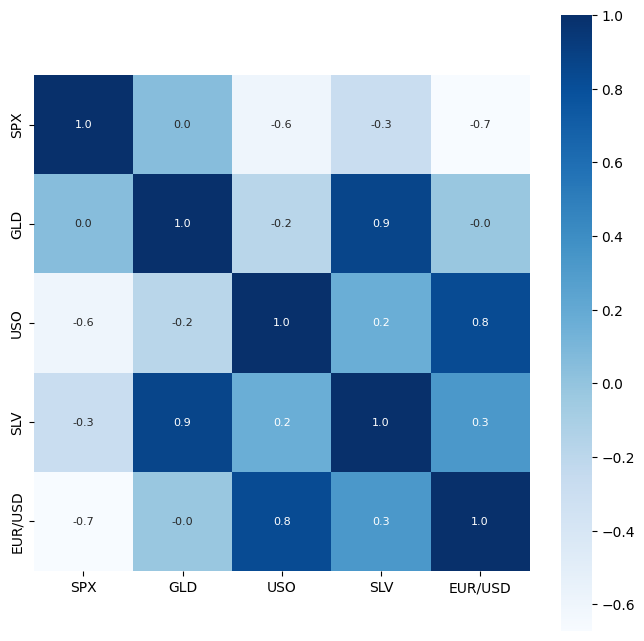

In [116]:
correlation=gold_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [117]:
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [119]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


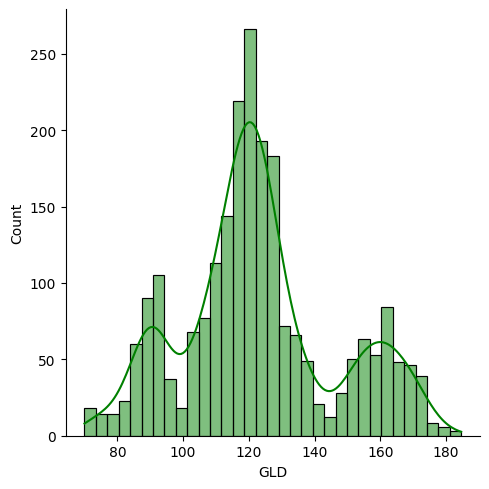

In [122]:
sns.displot(gold_data['GLD'],color='green',kde=True)

In [123]:
x=gold_data.drop(['GLD'],axis=1)
y=gold_data['GLD']

In [124]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [125]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=1,test_size=0.2)

In [ ]:
gold_model=RandomForestRegressor(n_estimators=100)
gold_model.fit(train_x,train_y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [128]:
pred_value=gold_model.predict(test_x)

In [132]:
print(pred_value)

[111.63420019 149.92470224 140.27550223 112.88700075 114.34069797
  95.93679982 110.79309931  94.54750195 120.89880029 127.11100201
 147.29360328 121.74030037 117.10869767  88.03510038  96.01109904
  92.69750167 116.10220139  89.12799971 124.96930218 114.94949935
 120.08919826 152.0138977  122.85060076 120.12420115 171.4298003
 108.78449748 119.9773996   87.41199836  88.15560024  90.13080057
 121.41399878 154.21250229 150.84640138 127.64869813 126.44140048
  90.73980166 163.49230431 121.07569979 106.19640171 144.04869739
  92.29350062 127.62839782 117.07430033 152.48989801 119.1218007
  90.19289879  76.98269835 120.22819938 131.69150219 118.97419827
 127.59809831 165.8478014  155.03199876  92.25529863 148.11490274
 151.11950026 114.24330114 112.03510091  87.22769771 127.81779935
 124.83849878 151.68589747 113.80809917 110.7724984  161.44989456
 118.71989897 107.67409809 130.38039668 131.81589656 125.69340195
 115.92750178 150.03870398 155.64600012 168.59490217 110.37959932
 141.8597023

In [129]:
error_value=metrics.r2_score(test_y,pred_value)
print(error_value)

0.9979337112041949


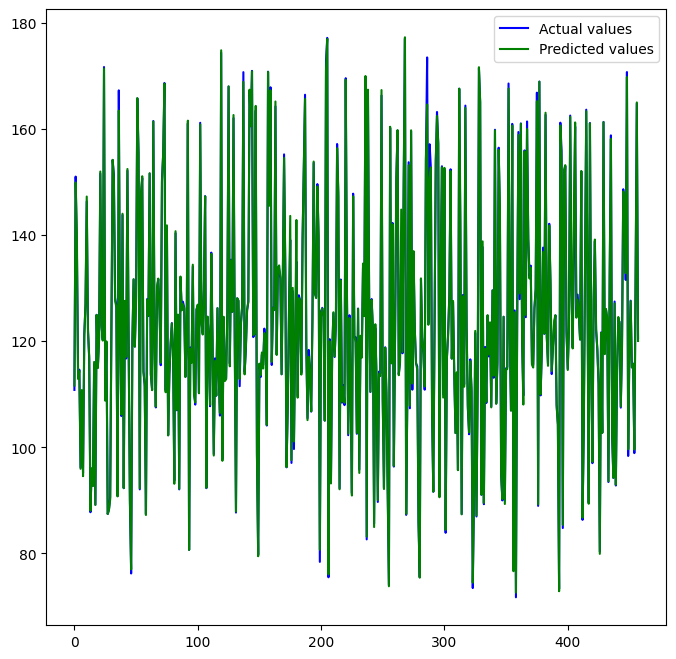

In [137]:
plt.figure(figsize=(8,8))
plt.plot(test_y.values,color='Blue',label='Actual values')
plt.plot(pred_value,color='Green',label='Predicted values')
plt.xlabel='Actual values'
plt.ylabel='Predicted values'
plt.title='Actual vs pred values'
plt.legend()
plt.show()